<a href="https://colab.research.google.com/github/shivanshsinghal107/ML-Libraries/blob/master/Pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import torch
import torchvision
from torchvision import transforms, datasets

In [2]:
train = datasets.MNIST('', train = True, download = True, transform = transforms.Compose([transforms.ToTensor()]))

test = datasets.MNIST('', train = False, download = True, transform = transforms.Compose([transforms.ToTensor()]))

  0%|          | 16384/9912422 [00:00<01:27, 112996.46it/s]

9920512it [00:00, 23941492.25it/s]                           


Extracting MNIST/raw/train-images-idx3-ubyte.gz to MNIST/raw


32768it [00:00, 317365.54it/s]                           
0it [00:00, ?it/s]

Extracting MNIST/raw/train-labels-idx1-ubyte.gz to MNIST/raw


1654784it [00:00, 5289674.96it/s]                           
8192it [00:00, 130666.76it/s]


Extracting MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST/raw
Extracting MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST/raw
Processing...
Done!


In [0]:
trainset = torch.utils.data.DataLoader(train, batch_size = 10, shuffle = True)
testset = torch.utils.data.DataLoader(test, batch_size = 10, shuffle = False)

In [0]:
import torch.nn as nn
import torch.nn.functional as F

In [5]:
class Net(nn.Module):
  def __init__(self):
    super().__init__()
    self.fc1 = nn.Linear(28*28, 64)
    self.fc2 = nn.Linear(64, 64)
    self.fc3 = nn.Linear(64, 64)
    self.fc4 = nn.Linear(64, 10)
  def forward(self, x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = F.relu(self.fc3(x))
    x = self.fc4(x)
    return F.log_softmax(x, dim = 1)
print(Net())

Net(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)


In [6]:
for data in trainset:
  print(data)
  break

[tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0

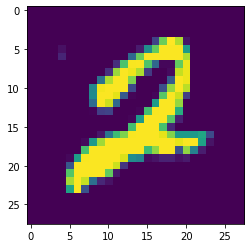

In [7]:
import matplotlib.pyplot as plt

plt.imshow(data[0][0].view(28,28))
plt.show()

In [8]:
print(data[0][0].shape)

torch.Size([1, 28, 28])


In [9]:
X = data[0][0].view(-1, 28*28)
net = Net()
output = net(X)
output

tensor([[-2.2296, -2.2330, -2.4027, -2.1856, -2.2158, -2.3939, -2.2752, -2.4444,
         -2.3698, -2.3132]], grad_fn=<LogSoftmaxBackward>)

In [10]:
import torch.optim as optim
optimizer = optim.Adam(net.parameters(), lr = 0.001)

EPOCHS = 3

for epoch in range(EPOCHS):
  for data in trainset:
    X, y = data
    net.zero_grad()
    output = net(X.view(-1,784))
    loss = F.nll_loss(output, y)
    loss.backward()
    optimizer.step()
  print(loss)

tensor(0.2498, grad_fn=<NllLossBackward>)
tensor(0.0014, grad_fn=<NllLossBackward>)
tensor(0.0815, grad_fn=<NllLossBackward>)


In [11]:
correct = 0
total = 0

with torch.no_grad():
  for data in testset:
    X, y = data
    output = net(X.view(-1,784))
    for idx, i in enumerate(output):
      if torch.argmax(i) == y[idx]:
        correct+=1
      total+=1

print("Accuracy : ", round(correct / total, 3))

Accuracy :  0.969


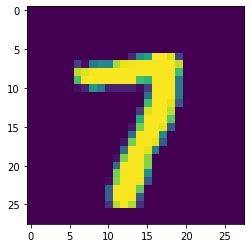

In [12]:
plt.imshow(X[0].view(28,28))
plt.show()

In [13]:
print(torch.argmax(net(X[0].view(-1,784))[0]))

tensor(7)
